---

## **Iris Flower Classification**

---

### **Objective:** Classify iris flowers into three species (Setosa, Versicolor, Virginica) based on measurements of their petals and sepals.

### **Dataset:** The classic Iris dataset from UCI Repository or scikit-learn.

---

**1. Load the dataset and explore it visually (scatter plots or histograms).**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df["species"] = iris.target
df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [4]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (150, 5)


In [6]:
print("Class Distribution:", df["species"].value_counts())

Class Distribution: species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


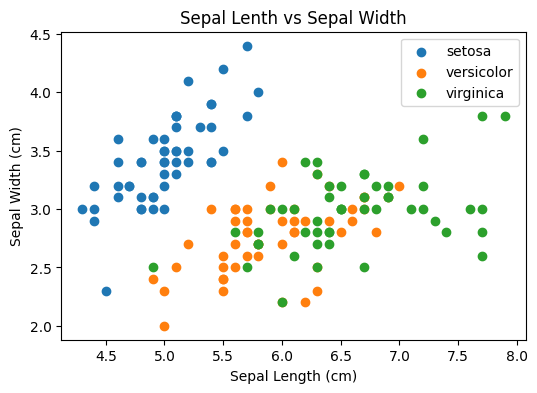

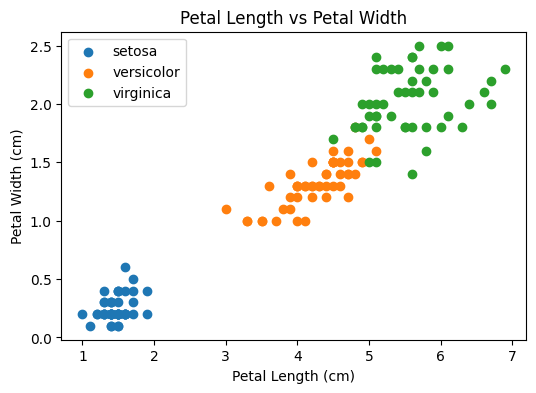

In [7]:
# Scatter plot: Sepal Length vs Sepal Width
plt.figure(figsize=(6,4))
for Species in df["species"].unique():
    subset = df[df["species"] == Species]
    plt.scatter(subset["sepal length (cm)"], subset["sepal width (cm)"], label=Species)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Lenth vs Sepal Width")
plt.legend()
plt.show()

# Scatter plot: petal Length vs petal Width
plt.figure(figsize=(6,4))
for Species in df["species"].unique():
    subset = df[df["species"] == Species]
    plt.scatter(subset["petal length (cm)"], subset["petal width (cm)"], label=Species)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width")
plt.legend()
plt.show()

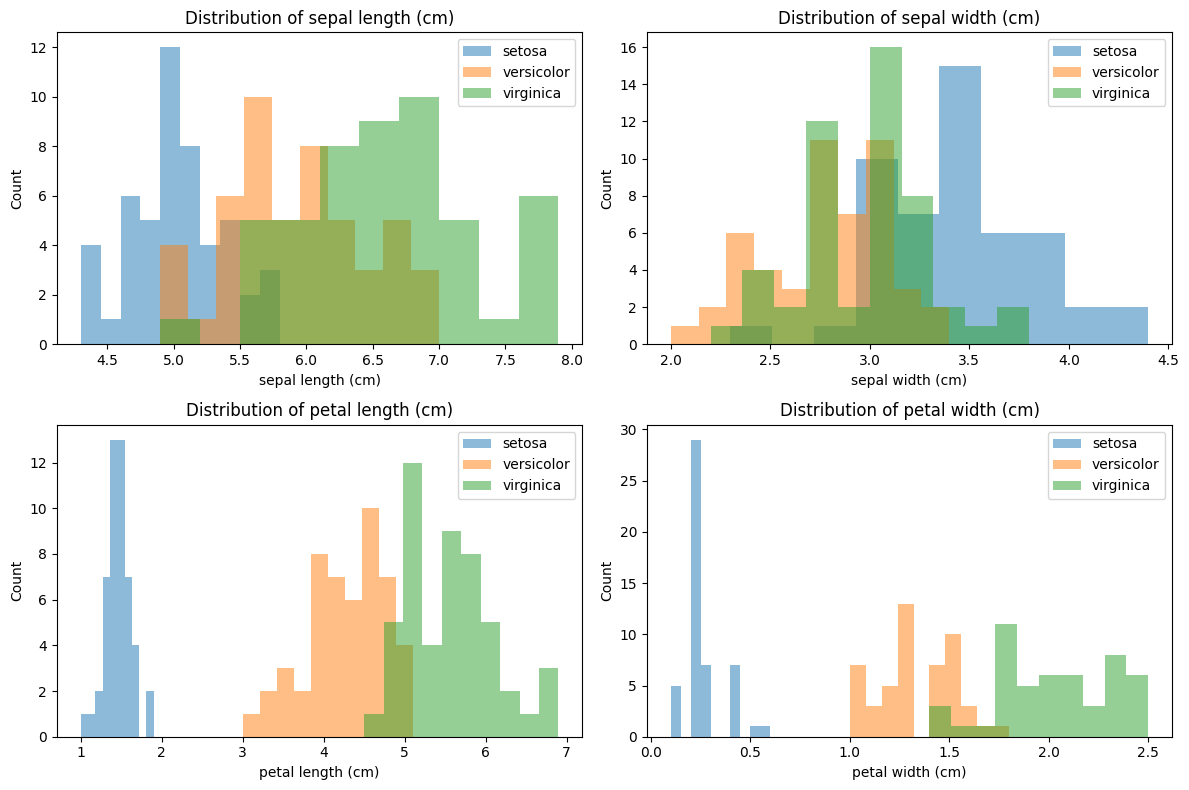

In [8]:
# histogram
features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

plt.figure(figsize=(12,8))

for i , feature in enumerate(features):
    plt.subplot(2,2,i+1)
    for Species in df["species"].unique():
        subset = df[df["species"] == Species]
        plt.hist(subset[feature], bins=10, alpha=0.5, label=Species)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    plt.legend()
plt.tight_layout()
plt.show()

---

**2. Split the data into training/test sets.**

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop("species", axis=1)
y = df["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])

Training set size: 120
Testing set size: 30


---

**3. Preprocess if needed (usually, it's already clean).**

In [10]:
#Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [11]:
#Check data types
print(df.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


In [12]:
#Check class balance
print(df["species"].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [13]:
#Check for duplicates
print(df.duplicated().sum())

1


In [14]:
#Drop duplicate row
df = df.drop_duplicates()

print("Duplicates:", df.duplicated().sum())
print("New dataset shape:", df.shape)
print("Class Balance after duplicate removal",df["species"].value_counts())

Duplicates: 0
New dataset shape: (149, 5)
Class Balance after duplicate removal species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64


In [15]:
# lets standardize the features (mean = 0, standard deviation = 1).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Before Scaling:\n", x_train.head())
print("After Scaling:\n", x_train_scaled[:5])

Before Scaling:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
8                  4.4               2.9                1.4               0.2
106                4.9               2.5                4.5               1.7
76                 6.8               2.8                4.8               1.4
9                  4.9               3.1                1.5               0.1
89                 5.5               2.5                4.0               1.3
After Scaling:
 [[-1.72156775 -0.33210111 -1.34572231 -1.32327558]
 [-1.12449223 -1.22765467  0.41450518  0.6517626 ]
 [ 1.14439475 -0.5559895   0.58484978  0.25675496]
 [-1.12449223  0.11567567 -1.28894078 -1.45494479]
 [-0.40800161 -1.22765467  0.13059752  0.12508575]]


**Missing Values:** No missing values were found in the dataset.

**Data Types:** All features were confirmed to be numeric.

**Duplicates:** The dataset contained 1 duplicate row, which was removed.

**Class Balance:** The classes remained nearly balanced after duplicate removal (49–50 samples each).

**Feature Scaling:** Standardization was applied to ensure fair comparison across features, especially for distance-based models like KNN and Logistic Regression.

Thus, the dataset is clean and ready for model training.

---

**4. Train a simple classifier (e.g., Logistic Regression, K-Nearest Neighbors, Decision 
Tree).**

In [16]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logist_reg = LogisticRegression(random_state=42)
logist_reg.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [17]:
# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

---

**5. Evaluate with accuracy, precision, or confusion matrix.** 

In [19]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [20]:
#logistic regression model evaluation
y_pred_lr = logist_reg.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average="macro"))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.9333333333333333
Precision: 0.9333333333333332
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [21]:
#KNN model evaluation
y_pred_knn = knn.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average="macro"))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


In [22]:
#Decision tree model evaluation
y_pred_dt = d_tree.predict(x_test_scaled)

print("Accuracy", accuracy_score(y_test, y_pred_dt))
print("Precision", precision_score(y_test, y_pred_dt, average="macro"))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy 0.9333333333333333
Precision 0.9333333333333332
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
